<a href="https://colab.research.google.com/github/Rmejiaz/ModeladoSimulacion/blob/main/Cuadernos/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEIR modeling of the COVID-19 and its dynamics

### Proyecto final de la asignatura Modelado y Simulación

### Réplica del siguiente artículo: https://link.springer.com/article/10.1007/s11071-020-05743-y#Tab4

### Artículo principal con todas las explicaciones y discusiones: https://github.com/Rmejiaz/ModeladoSimulacion/blob/main/Proyecto/Paper/Paper.pdf
##### Rafael Mejía Zuluaga
##### rmejiaz@unal.edu.co

## Modelo Propuesto:

\begin{aligned} \left\{ \begin{array}{l} \dot{S} = - \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) + {\rho _1}Q - {\rho _2}S + \alpha R\\ \dot{ E} = \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) - {\theta _1}E - {\theta _2}E\\ {\dot{I}}_1 = {\theta _1}E - {\gamma _1}{I_1}\\ \dot{I}_2 = {\theta _2}E - {\gamma _2}{I_2} - \varphi {I_2} + \lambda \left( \varLambda + Q \right) \\ \dot{R} = {\gamma _1}{I_1} + {\gamma _2}{I_2} + \phi H - \alpha R\\ \dot{H} = \varphi {I_2} - \phi H\\ \dot{Q} = \varLambda + {\rho _2}S - \lambda \left( {\varLambda + Q} \right) - {\rho _1}Q \end{array} \right. , \end{aligned}

## Descripción de las variables del sistema:

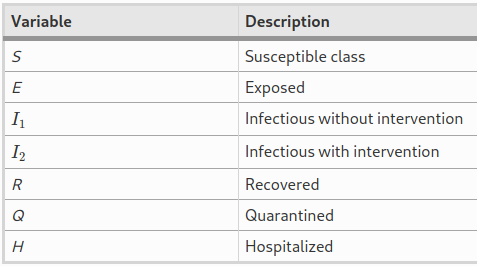

## Descripción de los parámetros del sistema:

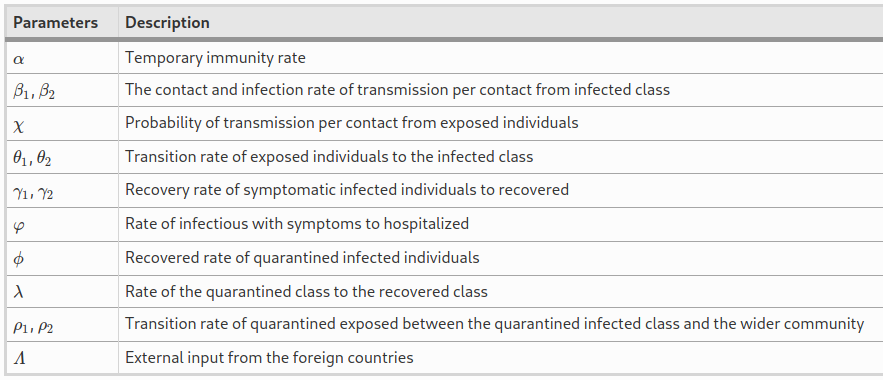



In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
alpha = 1.2048e-4
beta_1 = 1.0538e-1
beta_2 = 1.0538e-1
X = 1.6221e-1
theta_1 = 9.5e-4 
theta_2 = 3.5412e-2
gamma_1 = 8.5e-3
gamma_2 = 1.0037e-3
phi = 0.2910
Phi = 0.0107
lambda_ = 9.4522e-2 
rho_1 = 2.8133e-3
rho_2 = 1.2668e-1
Lambda = 100

def SEIRModel(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda = parameters
  S,E,I1,I2,R,H,Q = y
  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - phi*I2 + lambda_ * (Lambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + Phi*H - alpha*R
  H_dot = phi*I2 - Phi*H
  Q_dot = Lambda + rho_2*S - lambda_ * (Lambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot

var_names = ['Susceptible','Exposed','Infectious without intervention','Infectious with intervention','Recoveded','Hospitalized','Quarantined']

In [22]:
N=6.5563e4

parameters = [1.2048e-4, 1.0538e-1, 1.0538e-1, 1.6221e-1, 9.5e-4, 3.5412e-2, 8.5e-3, 1.0037e-3, 0.0973, 0.0416, 9.4522e-2, 2.8133e-3, 1.2668e-1, 100]

y0 = [N,5007,7,729,658,32,4711] 
t_span = [0,200]
t = np.arange(0,200,1)
yt = solve_ivp(SEIRModel,t_span,y0,args=(N,parameters),t_eval=t)

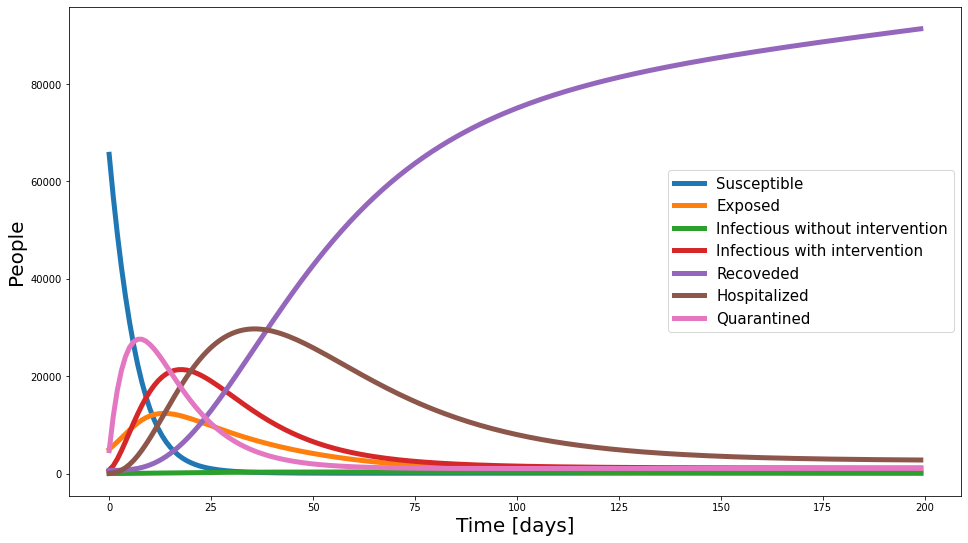

In [5]:
plt.figure(figsize=(16,9))
for i in range(yt.y.shape[0]):
  plt.plot(yt.t,yt.y[i],label=var_names[i],linewidth=5)
plt.legend(fontsize=15)
plt.xlabel("Time [days]",fontsize=20)
plt.ylabel("People",fontsize=20)
# plt.savefig("../Proyecto/Figures/ivp_1",)
plt.show()

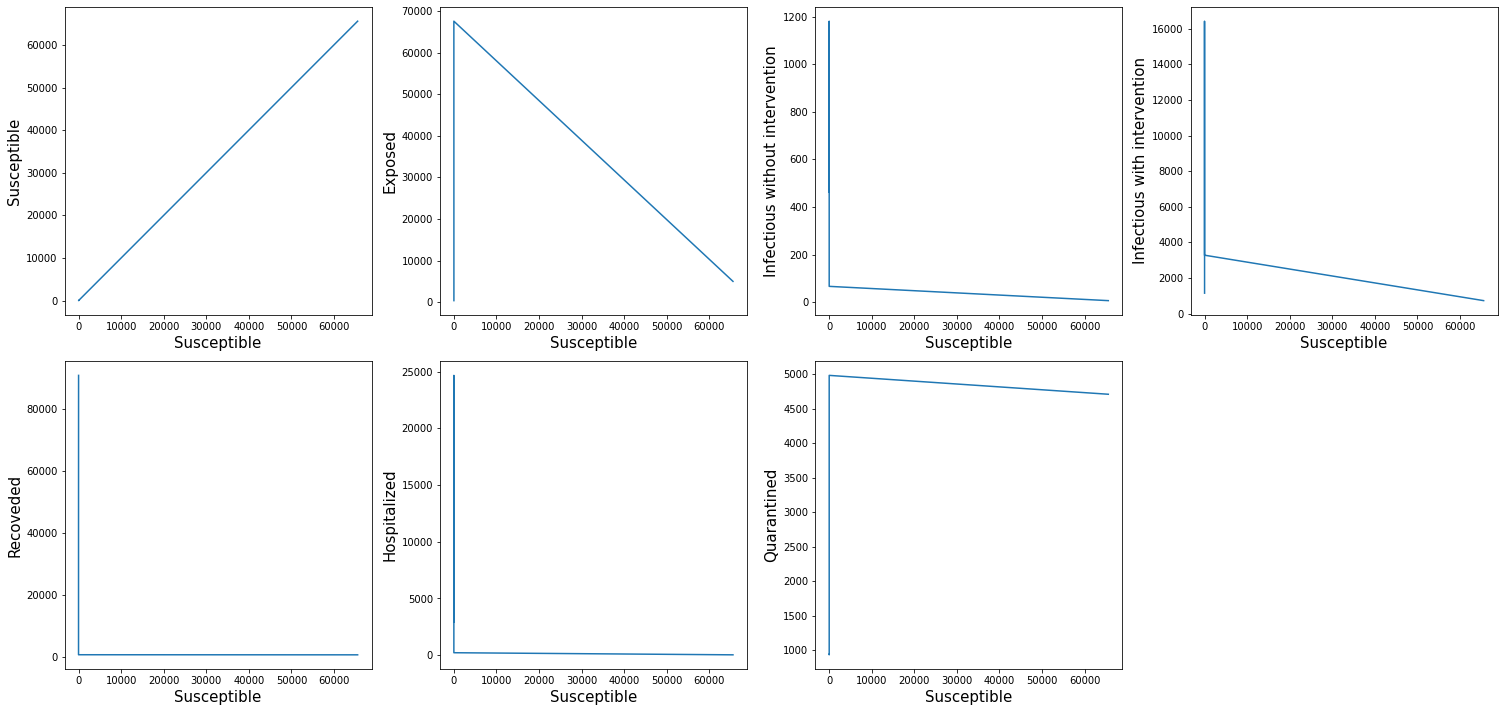

In [29]:
plt.figure(figsize=(21,10))
var_ = 0
for i,y in enumerate(yt.y):
  plt.subplot(2,int(yt.y.shape[0]/2)+1,i+1)
  plt.plot(yt.y[var_],y)
  plt.xlabel(var_names[var_],fontsize=15)
  plt.ylabel(var_names[i],fontsize=15)
plt.tight_layout()
plt.show()

## Modelo SEIR con estacionalidad e infección estocástica 

### Caso 1: 
El parámetro $\beta_1$ contiene estacionalidad e infección estocástica, y las tres tazas de contacto e infección se definen como:

$\beta_2 = 30.03, \chi = 30.40$


$\beta_1(t) = \beta_0(1 + \varepsilon_1 \sin(2\pi t) + \varepsilon_2 \xi(t)$

donde $\beta_0 = 2 \times \beta_1 = 60$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estacional y estocástica respectivamente. $\langle \xi(t) \rangle$ es ruido blanco gausiano, el cual tiene las propiedadees de $\langle \xi(t) \rangle = 0$ y $\langle \xi(t), \xi(\tau) \rangle = \delta(t - \tau)$



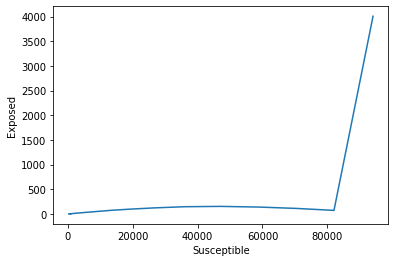

In [107]:
N=10e6
#             alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda
parameters = [0.08, 30, 30.03, 30.40, 30.054, 20.12, 8.5e-3, 1.0037e-3, 0.0973, 0.00009, 0.8, 0.4, 1.2668e-1, 0]



E1, E2 = 0.8, 0.2

def SEIRModel_case1(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda = parameters
  S,E,I1,I2,R,H,Q = y

  beta_2 = 30.03
  X = 30.40
  beta_1 = 60*(1+E1*np.sin(2*np.pi*t) + E2*np.random.normal())

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - phi*I2 + lambda_ * (Lambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + Phi*H - alpha*R
  H_dot = phi*I2 - Phi*H
  Q_dot = Lambda + rho_2*S - lambda_ * (Lambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


y0 = [94076,4007,262,524,31,100,1000] 
tf = 500
t_span = [0,tf]
t = np.arange(0,tf,1)
yt = solve_ivp(SEIRModel_case1,t_span,y0,args=(N,parameters),t_eval=t)

plt.plot(yt.y[0], yt.y[1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])
plt.show()

### Caso 2

El parámetro $\beta_2$ contiene infección estocástica y estacional, mientras que las otras dos tazas de infección permanecen constantes. Los parámetros quedan definidos como:

$\beta_1 = 30, \chi = 30.40$

$\beta_2(t) = \beta_0(1+\varepsilon_1 \sin(2 \pi t) + \varepsilon_2 \xi(t))$

Donde $\beta_0 = 2 \times \beta_2 = 60$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estocástica y estacional respectivamente. 

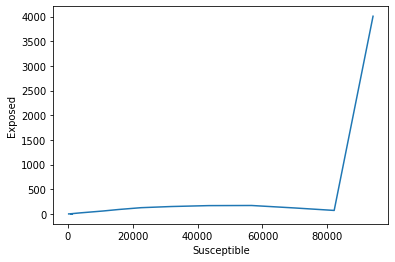

In [110]:
N=10e6
#             alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda
parameters = [0.08, 30, 30.03, 30.40, 30.054, 20.12, 8.5e-3, 1.0037e-3, 0.0973, 0.00009, 0.8, 0.4, 1.2668e-1, 0]



E1, E2 = 0.8, 0.2

def SEIRModel_case2(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, phi, Phi, lambda_, rho_1, rho_2, Lambda = parameters
  S,E,I1,I2,R,H,Q = y

  beta_1 = 30
  X = 30.40
  beta_2 = 60*(1+E1*np.sin(2*np.pi*t) + E2*np.random.normal())

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - phi*I2 + lambda_ * (Lambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + Phi*H - alpha*R
  H_dot = phi*I2 - Phi*H
  Q_dot = Lambda + rho_2*S - lambda_ * (Lambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


y0 = [94076,4007,262,524,31,100,1000] 
tf = 500
t_span = [0,tf]
t = np.arange(0,tf,1)
yt = solve_ivp(SEIRModel_case2,t_span,y0,args=(N,parameters),t_eval=t)

plt.plot(yt.y[0], yt.y[1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])
plt.show()

### Caso 3

El parámetro $\chi_1$ contiene infección estocástica y esatcional, y $\beta_1$ y $\beta_2$ son contactos. En este caso, los parámetros estarían dados por:

$\beta_1 = 30, \beta_2(t) = 30$

$\chi = \chi_0(1 + \varepsilon_1 \sin(2 \pi t) + \varepsilon_2 \xi(t))$

Donde $\beta_0 = 2\chi = 60.8$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estocástica y estacional respectivamente.

## Datos Manizales

In [ ]:
# !wget -O  Data.csv https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD

In [ ]:
# import pandas as pd

# Dataset = pd.read_csv('Data.csv', parse_dates=['fecha reporte web', 'Fecha de notificación', 'Fecha de diagnóstico'], index_col='Fecha de diagnóstico')

In [ ]:
# Dataset = Dataset[Dataset['Nombre municipio'] == 'MANIZALES']
# Dataset = Dataset.loc['2020-03-13':'2021-08-22']

In [ ]:
# Dataset = Dataset.drop(columns=['Nombre departamento', 'ID de caso', 'Código DIVIPOLA departamento', 'Código DIVIPOLA municipio', 'Nombre municipio', 'Unidad de medida de edad', 'Código ISO del país','Pertenencia étnica', 'Nombre del grupo étnico', 'Tipo de recuperación', 'Nombre del país', 'Tipo de contagio'])

In [ ]:
# Dataset_ubicacion = pd.get_dummies(Dataset['Ubicación del caso']).resample('d').sum()

# Dataset_ubicacion['Hospitalizados'] = Dataset_ubicacion['Hospital'] + Dataset_ubicacion['Hospital UCI']
# Dataset_ubicacion['Casa'] = Dataset_ubicacion['Casa'] + Dataset_ubicacion['casa']

In [ ]:
# Dataset_ubicacion['Hospitalizados']['2021'].plot(figsize=(16,9))
# # Dataset_ubicacion['Casa'].plot(figsize=(16,9))
# Dataset_ubicacion['Fallecido']['2021'].plot(figsize=(16,9))

In [ ]:
# Dataset

In [ ]:
# print(set(Dataset['Estado']))
# print(set(Dataset['Ubicación del caso']))